# riffusion colab demo

Run [riffusion](https://www.riffusion.com/about) in a gradio demo with a colab host

Riffusion project by [Seth Forsgren](https://twitter.com/sethforsgren) and [Hayk Martiros](https://github.com/hmartiro), colab notebook by [Jasper Gilley](https://twitter.com/0xjasper)

Feel free to DM Jasper on Twitter if you have any problems with the notebook

Some cool prompt ideas can be found at https://ai-art-wiki.com/wiki/Riffusion#Prompts

In [ ]:
!nvidia-smi

Sun Jul 30 15:53:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#@title Clone the inference repo
!git clone https://github.com/hmartiro/riffusion-inference
%cd riffusion-inference

Cloning into 'riffusion-inference'...
remote: Enumerating objects: 793, done.
remote: Counting objects: 100% (370/370), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 793 (delta 296), reused 259 (delta 253), pack-reused 423
Receiving objects: 100% (793/793), 8.29 MiB | 17.88 MiB/s, done.
Resolving deltas: 100% (491/491), done.
/content/riffusion-inference


In [ ]:
#@title Install requirements (you may need to restart the kernel after this)
!pip install -r requirements.txt
!pip install gradio
!pip install --upgrade pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.1/87.1 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.8/418.8 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.7 MB/s eta 0:00:00
   

In [ ]:
#@title Imports
from diffusers import DiffusionPipeline
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams
from io import BytesIO
from IPython.display import Audio

pipe = DiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1")
pipe = pipe.to("cuda")

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:178: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 in the configuration fil

In [ ]:
#@title Define a `predict` function

params = SpectrogramParams()
converter = SpectrogramImageConverter(params)

def predict(prompt, negative_prompt):
    spec = pipe(
        prompt,
        negative_prompt=negative_prompt,
        width=768,
    ).images[0]

    wav = converter.audio_from_spectrogram_image(image=spec)
    wav.export('output.wav', format='wav')
    return 'output.wav', spec

  0%|          | 0/50 [00:00<?, ?it/s]

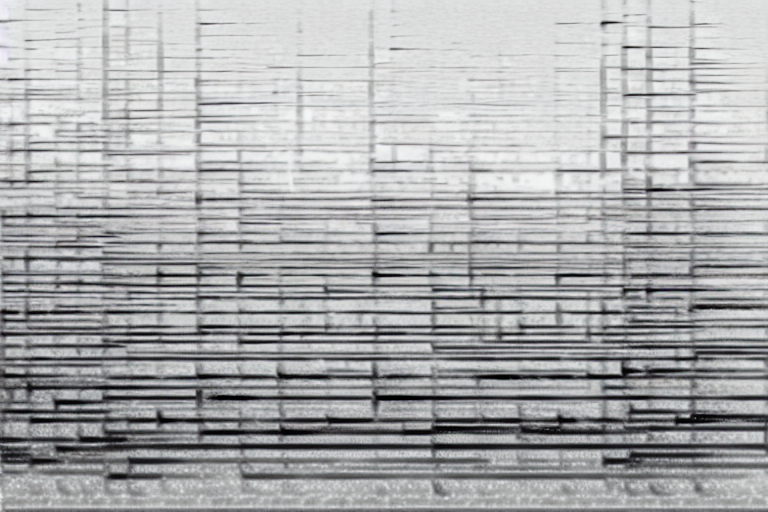

In [ ]:
#@title Run with Colab interface
prompt = "solo piano piece, classical"#@param {type:"string"}
negative_prompt = "drums"#@param {type:"string"}

path, spec = predict(prompt, negative_prompt)

display(spec)
Audio('output.wav')

In [ ]:
#@title Run a Gradio demo
import gradio as gr

gr.Interface(
    predict,
    inputs=["text", "text"],
    outputs=[gr.outputs.Audio(type='filepath'), gr.outputs.Image(type='pil')],
    title="Riffusion",
).launch(share=True, debug=True)

<ipython-input-7-ebddbec17446>:7: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=[gr.outputs.Audio(type='filepath'), gr.outputs.Image(type='pil')],


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9df892e9ca26d35a88.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9df892e9ca26d35a88.gradio.live


In [ ]:
#@title Upload your own files for style transfer
#@markdown #### Drop your audio files (.wav is best) in Colab's file uploader, then type the filename below and run

from google.colab import files
# uploaded = files.upload()

from scipy.io import wavfile
import numpy as np
from PIL import Image

filename = "rondo_alla_turca.wav"#@param {type:"string"}

# read uploaded file to wav
rate, data = wavfile.read(f'../{filename}')

# resample from 48000 to 44100
# from scipy.signal import resample
# data = resample(data, int(data.shape[0] * 44100 / 48000))

# convert to mono
data = np.mean(data, axis=1)

# convert to float32
data = data.astype(np.float32)

# take a random 7 second slice of the audio
data = data[rate*7:rate*14]

spectrogram = spectrogram_from_waveform(
    waveform=data,
    sample_rate=rate,
    # width=768,
    n_fft=8192,
    hop_length=512,
    win_length=8192,
)

def image_from_spectrogram(
    spectrogram: np.ndarray, max_volume: float = 50, power_for_image: float = 0.25
) -> Image.Image:
    """
    Compute a spectrogram image from a spectrogram magnitude array.
    """
    # Apply the power curve
    data = np.power(spectrogram, power_for_image)

    # Rescale to 0-255
    data = data * 255 / max_volume

    # Invert
    data = 255 - data

    # Convert to a PIL image
    image = Image.fromarray(data.astype(np.uint8))

    # Flip Y
    image = image.transpose(Image.FLIP_TOP_BOTTOM)

    # Convert to RGB
    image = image.convert("RGB")

    return image

spec = image_from_spectrogram(spectrogram)
# img.save('../rondo_alla_turca.png')
# display(img)

# Audio(data, rate=rate)

# wav2 = wav_bytes_from_spectrogram_image(img)
# with open("../inverse-spectro.wav", "wb") as f:
#     f.write(wav2[0].getbuffer())

# Audio('../inverse-spectro.wav')

FileNotFoundError: ignored

In [ ]:
#@title Audio-to-audio based on the previous generated sound: define new pipeline

import torch
from diffusers import StableDiffusionImg2ImgPipeline

# load the pipeline
device = "cuda"
MODEL_ID = "riffusion/riffusion-model-v1"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16)

pipe = pipe.to(device)

#### NOTE: Colab doesn't have enough memory to simultaneously load both the base riffusion pipeline and the audio2audio pipeline. You'll need to re-run the first 'imports' cell if you want to run regular riffusion after instantiating the audio2audio pipeline in in this cell

#### you can run the audio2audio inference cell (below) as many times as you like, though

In [ ]:
#@title Audio-to-audio: run inference
prompt = "epic orchestra symphony" #@param {type:"string"}

images = pipe(
    prompt=prompt,
    image=spec,
    strength=0.5,
    guidance_scale=7
).images

wav = converter.audio_from_spectrogram_image(images[0])
wav.export('audio2audio.wav', format='wav')
Audio('audio2audio.wav')